## Association Rule Homework

### Team Members:

#### Shiva Sai Praneeth Chakinala - 801147603
#### Chaitanya Kintali                      - 801097831
#### Prashanth Minkuri                    - 801166901
#### Pranitha Amrutha Veldanda    - 801166969

### Introduction of dataset

For this assignement we are taking new covid dataset which contains county  data with different features such as number of votes favoured to Trump and Biden, number of covid cases and deaths, Poverty and Unemployment percentages.

Source : https://www.kaggle.com/etsc9287/2020-general-election-polls

In [1]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
df = pd.read_csv('county_statistics.csv')
df.shape

(4867, 9)

In [3]:
df.columns

Index(['county', 'state', 'percentage20_Donald_Trump',
       'percentage20_Joe_Biden', 'cases', 'deaths', 'TotalPop', 'Poverty',
       'Unemployment'],
      dtype='object')

### Excluding all the rows which have null values

In [4]:
df=df[df.Unemployment.notnull()]
df=df[df.deaths.notnull()]
df=df[df.percentage20_Joe_Biden.notnull()]


#### Shape of dataframe after dropping all null values

In [5]:
df.shape

(3048, 9)

In [6]:
df1=df[['county','state']]

In [7]:
df1['Red_county']= df['percentage20_Donald_Trump']>df['percentage20_Joe_Biden']

<ipython-input-7-f3b55f77a096>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Red_county']= df['percentage20_Donald_Trump']>df['percentage20_Joe_Biden']


In [8]:
df1['Blue_county']= df['percentage20_Donald_Trump']<df['percentage20_Joe_Biden']

<ipython-input-8-e2443acf4fe1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Blue_county']= df['percentage20_Donald_Trump']<df['percentage20_Joe_Biden']


In [9]:
df1.head(20)

,county,state,Red_county,Blue_county
0,Abbeville,SC,True,False
3,Acadia,LA,True,False
4,Accomack,VA,True,False
9,Ada,ID,True,False
10,Adair,IA,True,False
11,Adair,KY,True,False
12,Adair,MO,True,False
13,Adair,OK,True,False
14,Adams,CO,False,True
15,Adams,IA,True,False


In [10]:
df1.Red_county.value_counts()

True     2577
False     471
Name: Red_county, dtype: int64

In [11]:

df1.Blue_county.value_counts()


False    2577
True      471
Name: Blue_county, dtype: int64

In [12]:
df1

,county,state,Red_county,Blue_county
0,Abbeville,SC,True,False
3,Acadia,LA,True,False
4,Accomack,VA,True,False
9,Ada,ID,True,False
10,Adair,IA,True,False
...,...,...,...,...
4862,Yuma,AZ,True,False
4863,Yuma,CO,True,False
4864,Zapata,TX,True,False
4865,Zavala,TX,False,True


In [13]:
df1.shape

(3048, 4)

The apriori algorithmn implemented by mlxtend requires a dataframe that has either 0 and 1 or True and False as the data. In order to modify the dataframe into that format we will find the counties which have top 5% deaths and 5% cases.Similary we will compute counties which have top 10% Unemployment and proverty population

In [14]:
df1['death_percent']=(df['deaths']*100)/df['cases']

<ipython-input-14-812e23a6c5b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['death_percent']=(df['deaths']*100)/df['cases']


In [15]:
df1['cases_percent']=(df['cases']*100)/df['TotalPop']

<ipython-input-15-bad07cede716>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cases_percent']=(df['cases']*100)/df['TotalPop']


In [16]:
df1['Top_Deaths']=df1['death_percent']>5

<ipython-input-16-62363cc236fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Top_Deaths']=df1['death_percent']>5


In [17]:
df1['Top_cases']=df1['cases_percent']>5

<ipython-input-17-5e905bf8fed2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Top_cases']=df1['cases_percent']>5


In [18]:
df1['Top_cases'].value_counts()

False    2739
True      309
Name: Top_cases, dtype: int64

In [19]:
df1['Top_Deaths'].value_counts()

False    2858
True      190
Name: Top_Deaths, dtype: int64

In [20]:
df1['Top_unemploy']= df['Unemployment']>10

In [21]:
df1['Top_unemploy'].value_counts()

False    2787
True      261
Name: Top_unemploy, dtype: int64

In [22]:
df1['Top_Poverty']= df['Poverty']>10

In [23]:
df1['Top_Poverty'].value_counts()


True     2528
False     520
Name: Top_Poverty, dtype: int64

In [24]:
df1.to_csv('filter1.csv')

In [25]:
df1.drop(['state', 'death_percent','cases_percent'], axis = 1,inplace=True)

In [26]:
df1

,county,Red_county,Blue_county,Top_Deaths,Top_cases,Top_unemploy,Top_Poverty
0,Abbeville,True,False,False,False,False,True
3,Acadia,True,False,False,True,False,True
4,Accomack,True,False,False,False,False,True
9,Ada,True,False,False,False,False,True
10,Adair,True,False,False,False,False,False
...,...,...,...,...,...,...,...
4862,Yuma,True,False,False,True,True,True
4863,Yuma,True,False,False,False,False,True
4864,Zapata,True,False,False,False,True,True
4865,Zavala,False,True,False,False,True,True


In [27]:
df1=df1.set_index('county')

In [28]:
df1

,Red_county,Blue_county,Top_Deaths,Top_cases,Top_unemploy,Top_Poverty
county,,,,,,
Abbeville,True,False,False,False,False,True
Acadia,True,False,False,True,False,True
Accomack,True,False,False,False,False,True
Ada,True,False,False,False,False,True
Adair,True,False,False,False,False,False
...,...,...,...,...,...,...
Yuma,True,False,False,True,True,True
Yuma,True,False,False,False,False,True
Zapata,True,False,False,False,True,True


### Implementing apriori algorithm on this dataset

Now that the data is structured properly, we can generate frequent item sets that have a support of at least 7%

In [29]:
frequent_itemsets = apriori(df1, min_support=0.07, use_colnames=True)

In [30]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Red_county),(Top_cases),0.845472,0.101378,0.082021,0.097012,0.956934,-0.003691,0.995165
1,(Top_cases),(Red_county),0.101378,0.845472,0.082021,0.809061,0.956934,-0.003691,0.809305
2,(Top_Poverty),(Red_county),0.829396,0.845472,0.703412,0.848101,1.003109,0.002180,1.017306
3,(Red_county),(Top_Poverty),0.845472,0.829396,0.703412,0.831975,1.003109,0.002180,1.015348
4,(Top_Poverty),(Blue_county),0.829396,0.154528,0.125984,0.151899,0.982988,-0.002180,0.996900


In [31]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Top_Poverty),(Red_county),0.829396,0.845472,0.703412,0.848101,1.003109,0.002180,1.017306
3,(Red_county),(Top_Poverty),0.845472,0.829396,0.703412,0.831975,1.003109,0.002180,1.015348
7,(Top_cases),(Top_Poverty),0.101378,0.829396,0.086286,0.851133,1.026207,0.002204,1.146012
9,(Top_unemploy),(Top_Poverty),0.085630,0.829396,0.084646,0.988506,1.191838,0.013625,14.842520


#### Observations

We can observe from the above results that  For instance, we can see that rows with high lift occurs more frequently.

Also top poverty hit counties are happened to be more red counties and also high number of covid cases are observed in the counties where poverty is high.

### a). How can you apply association rules to your choice of data for your project? If the data doesn't lend itself to association rules, describe a covid-19 data source that you can use with association rules (with some data preparation of course).

In order to apply association rules we have selected dataset from Kaggle which has different features such as votes of Trump,Biden,Deaths,Postives cases,Poverty and Unemployment fields. We have applied association rules by implementing  apriori algorithm on our selected dataset as mentioned in the above section. Some of the associations we found are 

Poverty is high in the Red counties with support of 70% and confidence of 80%.
Number of cases is high in the counties which have more property with support of 8% and  confidence of 85%.

### b)  What types of data preparation are necessary to ready your choice of data for association rules?

- Based on number of votes favoured to Trump and Biden we have calculated that particular county is either Red or Blue.
- We have calculated counties which have top 5% death and positive cases and also counties which have top 10% Unemployment and proverty population. We have one hot-encoded these column values based on the above conditions.
- In order to prepare the data ready for association rules we need to make sure there are no null values in the dataset.We need to drop the rows that don’t have values for tin the dataframe
- It is also required the values of the dataframe has to be either 0,1 or True,False values.
- We will consolidate the dataframe in such a way that each row corresponds as transaction that contains the values corresponds to different features.

### c)  How would you plan to limit the consequent to get the types of rules that can be useful?

 Association rule mining algorithms normally discover a huge quantity of rules and do not guarantee that all the rules found are relevant. Support and confidence factors can be used for obtaining interesting rules which have values for these factors greater than a threshold value. Although these two parameters allow the pruning of many associations, another common constraint is to indicate the attributes that must or cannot be present in the antecedent or consequent of the discovered rules.
 Another solution is to evaluate, and post-prune the obtained rules in order to find the most interesting rules for a specific problem. Traditionally, the use of objective measures has been suggested , such as support and confidence,as well as others measures such as Laplace, chi-square statistic,correlation coefficient, entropy gain, gini, interest, conviction, etc. These measures can be used for ranking the obtained rules in order than the user can select the rules with highest values in the measures that he/she is more interested.
Most of the subjective approaches involve user participation in order to express, in accordance with his or her previous knowledge, which rules are of interest. Some suggested subjective measures are:

#### • Unexpectedness:
Rules are interesting if they are unknown to the user or contradict the user’s knowledge.
#### • Actionability:
Rules are interesting if users can do something with them to their advantage.

The number of rules can be decreased by only showing unexpected and actionable rules to the teacher and not all the discovered rules. In, an Interestingness Analysis System (IAS) is proposed. It compares rules discovered with the user's knowledge about the area of interest. Let U be the set of user’s specifications representing his/her knowledge space, A be the set of discovered association rules,this algorithm implements a pruning technique for removing redundant or insignificant rules by ranking and classifying them into four categories:
####  Conforming rules: 
a discovered rule Ai∈A conforms to a piece of user’s knowledge Uj if both the antecedent and the consequent parts of Ai match those of Uj∈U well.
#### Unexpected consequent rules:
a discovered rule Ai∈A has unexpected consequents with respect to Uj∈U if the antecedent part of Ai matches that of Uj well.
#### Unexpected condition rules: 
a discovered rule Ai∈A has unexpected conditions with respect to Uj∈U if the consequent part of Ai matches that of Uj well, but not the antecedent part.
#### Both-side unexpected rules: 
a discovered rule Ai∈A is both-side unexpected withrespect to Uj∈U if the antecedent and consequent parts of Ai don’t match those of Uj well.

### d) What support and confidence will be used for good results?
Support is an important measure because a rule that has very low support might occur simply by chance. Also, from a business perspective a low support rule is unlikely to be interesting because it might not be profitable to promote items that customers seldom buy together. For these reasons, we are interested in finding rules whose support is greater than some user-defined threshold.

Confidence, on the other hand, measures the reliability of the inference made by a rule. For a given rule A → B , the higher the confidence, the more likely it is for B to be present in transactions that contain A. Confidence also provides an estimate of the conditional probability of B given A

### e) How does the concept of lift apply to the evaluation of your rules?

Lift is also known as Interest factor. 

I(A, B) = s(A, B)/s(A) × s(B)=> support/antecedent suport * consequent support
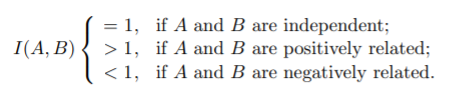

For the above example thus 0.703412 / 0.829396 * 0.45472 = 1.003109 which suggests that strong  positive relationship between the poverty in red_county which belongs to Donold Trump.

For the above example thus 0.125984/0.829396 *0.154528	= 0.095693 which suggests that strong negative relationship between the poverty in blue_county which belongs to Biden.

### References

1. https://docs.oracle.com/cd/E11882_01/datamine.112/e16808/algo_apriori.htm#DMCON287

2. https://www-users.cs.umn.edu/~kumar001/dmbook/ch5_association_analysis.pdf

3. https://sci2s.ugr.es/keel/pdf/specific/congreso/3-associationrules-Final.pdf